In [1]:
"""Use GMRES and augmented least squares to find optimal Tikhonov regularisation"""

'Use GMRES and augmented least squares to find optimal Tikhonov regularisation'

In [2]:
from functools import partial

import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter

from deblurring.blurring import blur_and_noise
from solvers.least_square import GMRESSolver, LSQRSolver
from common.operators import derivative_operator, identity_operator
from evaluation.tuning import StandardTuner

Estimated noise variance 0.0003988339069365715 vs. actual 0.0004


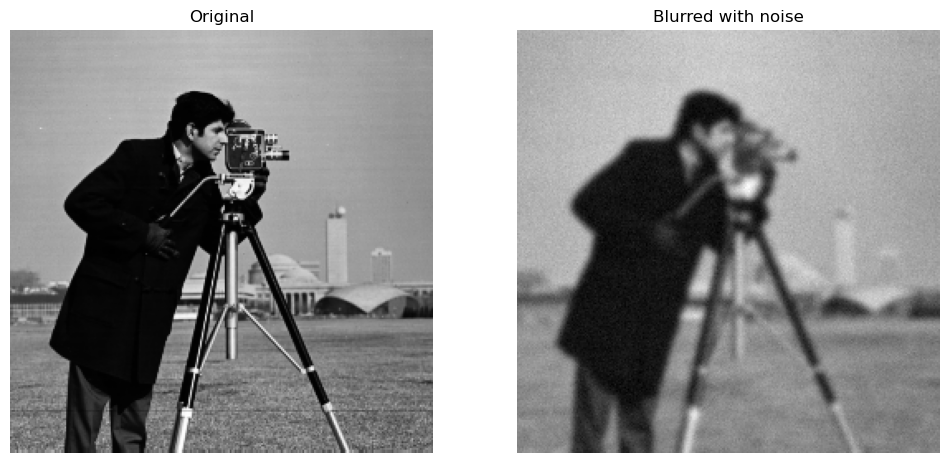

In [3]:
"""Read image and blur with added noise"""

f = plt.imread("../../data/Cameraman256.png")
f = (f - f.min()) / (f.max() - f.min())

theta = 0.02
sigma = 2.0
kernel = partial(gaussian_filter, sigma=sigma)
g = blur_and_noise(f, kernel, theta)
noise_variance = np.var(blur_and_noise(np.zeros_like(g), kernel, theta))
print(f"Estimated noise variance {noise_variance} vs. actual {np.square(theta)}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(f, cmap="gray")
plt.axis("off")
plt.title("Original")
plt.subplot(1, 2, 2)
plt.imshow(g, cmap="gray")
plt.axis("off")
plt.title("Blurred with noise")
plt.show()

In [4]:
"""Set up parameters, regularisation operators and tuners"""

alphas = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1]

gmres_tuner = StandardTuner(
    solver=GMRESSolver,
    g=g,
    A=kernel,
    noise_variance=noise_variance,
    f=f,
)

lsqr_tuner = StandardTuner(
    solver=LSQRSolver,
    g=g,
    A=kernel,
    noise_variance=noise_variance,
    f=f,
)

[WARNING] 2025-02-25 14:41:38 | No valid reference provided | evaluation.eval_metrics-__init__:58
[WARNING] 2025-02-25 14:41:38 | No valid reference provided | evaluation.eval_metrics-__init__:58


[INFO] 2025-02-25 14:41:55 | Alpha 1e-08: discrepancy -0.00010426075188762931 | evaluation.eval_metrics-log_metrics:211
[INFO] 2025-02-25 14:42:20 | Alpha 1e-07: discrepancy -0.00010398578885751237 | evaluation.eval_metrics-log_metrics:211
[INFO] 2025-02-25 14:42:35 | Alpha 1e-06: discrepancy -0.00010178936976112501 | evaluation.eval_metrics-log_metrics:211
[INFO] 2025-02-25 14:42:44 | Alpha 1e-05: discrepancy -9.326823892419551e-05 | evaluation.eval_metrics-log_metrics:211
[INFO] 2025-02-25 14:42:48 | Alpha 0.0001: discrepancy -7.868135425549114e-05 | evaluation.eval_metrics-log_metrics:211
[INFO] 2025-02-25 14:42:49 | Alpha 0.001: discrepancy -6.110755755380675e-05 | evaluation.eval_metrics-log_metrics:211
[INFO] 2025-02-25 14:42:49 | Alpha 0.01: discrepancy -1.0963106165064543e-05 | evaluation.eval_metrics-log_metrics:211
[INFO] 2025-02-25 14:42:50 | Alpha 0.1: discrepancy 0.0022786769921847145 | evaluation.eval_metrics-log_metrics:211
[INFO] 2025-02-25 14:42:50 | Alpha 1.0: discrep

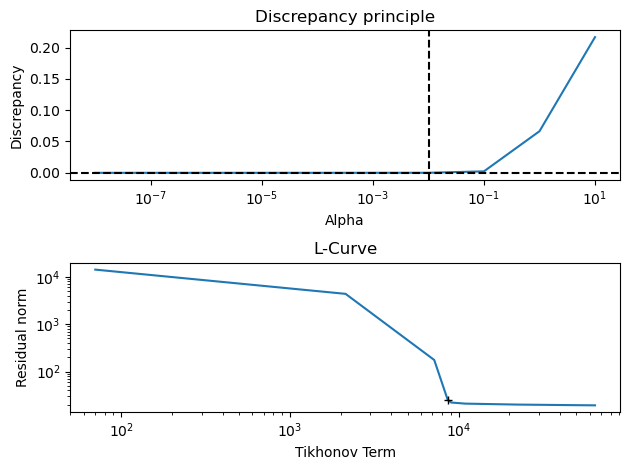

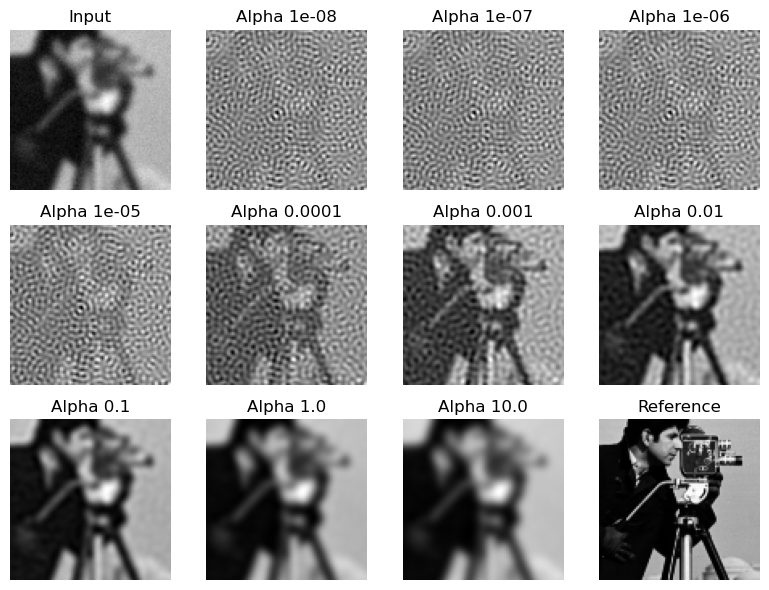

Optimal alpha: 0.010430932160721216
DP: -7.969759155988863e-06, MSE: 0.004418090239200592


In [5]:
"""Find optimal alpha using GMRES and TK0"""

gmres_tuner.parameter_sweep(alphas=alphas, L=identity_operator, save_imgs=True)
gmres_tuner.display_metrics()
gmres_tuner.display_sample(slice(50, 150), slice(80, 180))
print(f"Optimal alpha: {gmres_tuner.optimal_alpha}")
print(f"DP: {gmres_tuner.optimal_metrics['discrepancy']}, MSE: {gmres_tuner.optimal_metrics['MSE']}")
gmres_tk0_f_hat = gmres_tuner._optimal_f_hat

[INFO] 2025-02-25 14:42:51 | Alpha 1e-08: discrepancy -8.086187883423482e-05 | evaluation.eval_metrics-log_metrics:211
[INFO] 2025-02-25 14:42:51 | Alpha 1e-07: discrepancy -8.08618705393459e-05 | evaluation.eval_metrics-log_metrics:211
[INFO] 2025-02-25 14:42:52 | Alpha 1e-06: discrepancy -8.086105041155926e-05 | evaluation.eval_metrics-log_metrics:211
[INFO] 2025-02-25 14:42:53 | Alpha 1e-05: discrepancy -8.078758345231768e-05 | evaluation.eval_metrics-log_metrics:211
[INFO] 2025-02-25 14:42:53 | Alpha 0.0001: discrepancy -7.766150284869598e-05 | evaluation.eval_metrics-log_metrics:211
[INFO] 2025-02-25 14:42:54 | Alpha 0.001: discrepancy -6.15484868889362e-05 | evaluation.eval_metrics-log_metrics:211
[INFO] 2025-02-25 14:42:54 | Alpha 0.01: discrepancy -1.1042940450822802e-05 | evaluation.eval_metrics-log_metrics:211
[INFO] 2025-02-25 14:42:54 | Alpha 0.1: discrepancy 0.002278674659563401 | evaluation.eval_metrics-log_metrics:211
[INFO] 2025-02-25 14:42:54 | Alpha 1.0: discrepancy 0

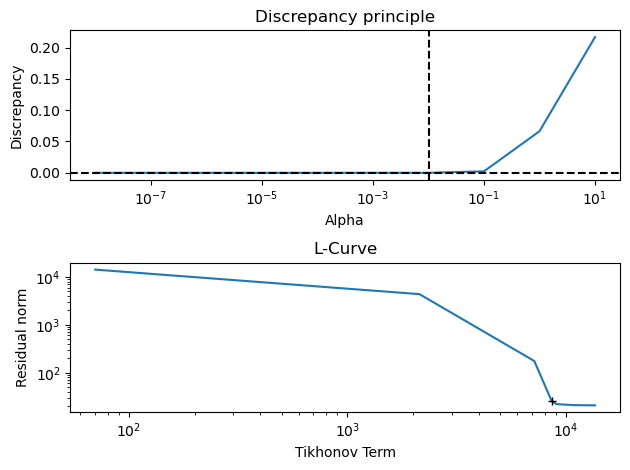

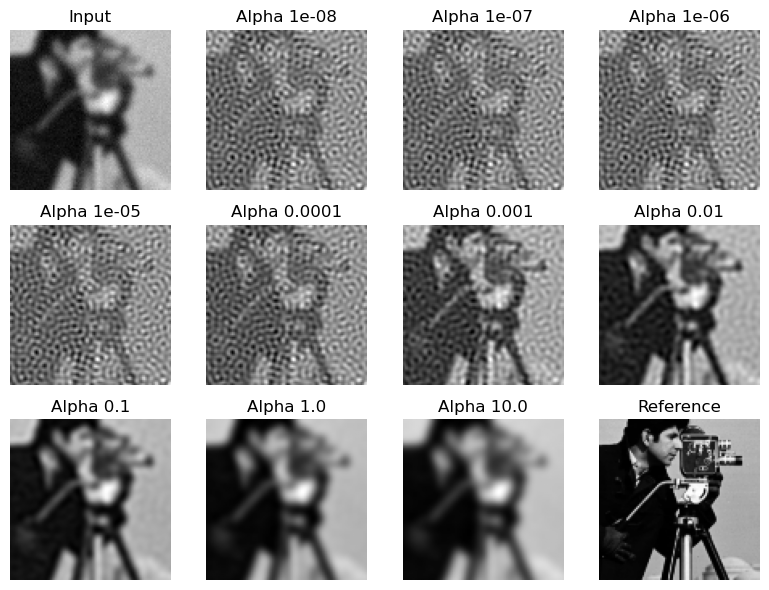

Optimal alpha: 0.01043405555364901
DP: -8.046980063236835e-06, MSE: 0.004421189754451584


In [6]:
"""Find optimal alpha using LSQR and TK0"""

lsqr_tuner.parameter_sweep(alphas=alphas, L=identity_operator, save_imgs=True)
lsqr_tuner.display_metrics()
lsqr_tuner.display_sample(slice(50, 150), slice(80, 180))
print(f"Optimal alpha: {lsqr_tuner.optimal_alpha}")
print(f"DP: {lsqr_tuner.optimal_metrics['discrepancy']}, MSE: {lsqr_tuner.optimal_metrics['MSE']}")
lsqr_tk0_f_hat = lsqr_tuner._optimal_f_hat

[INFO] 2025-02-25 14:43:14 | Alpha 1e-08: discrepancy -0.00010421021305428258 | evaluation.eval_metrics-log_metrics:211
[INFO] 2025-02-25 14:43:31 | Alpha 1e-07: discrepancy -0.00010351807374114869 | evaluation.eval_metrics-log_metrics:211
[INFO] 2025-02-25 14:43:45 | Alpha 1e-06: discrepancy -9.922427077099701e-05 | evaluation.eval_metrics-log_metrics:211
[INFO] 2025-02-25 14:43:49 | Alpha 1e-05: discrepancy -8.831467455085716e-05 | evaluation.eval_metrics-log_metrics:211
[INFO] 2025-02-25 14:43:50 | Alpha 0.0001: discrepancy -7.360619399529047e-05 | evaluation.eval_metrics-log_metrics:211
[INFO] 2025-02-25 14:43:51 | Alpha 0.001: discrepancy -5.751419302962868e-05 | evaluation.eval_metrics-log_metrics:211
[INFO] 2025-02-25 14:43:51 | Alpha 0.01: discrepancy -3.6892709013316386e-05 | evaluation.eval_metrics-log_metrics:211
[INFO] 2025-02-25 14:43:51 | Alpha 0.1: discrepancy 2.1945120782649555e-05 | evaluation.eval_metrics-log_metrics:211
[INFO] 2025-02-25 14:43:51 | Alpha 1.0: discrep

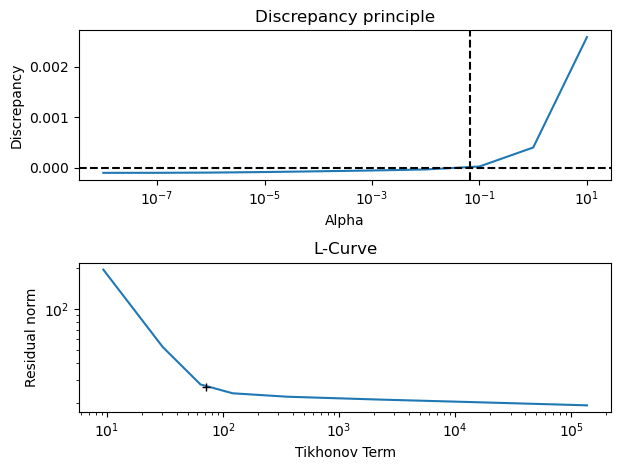

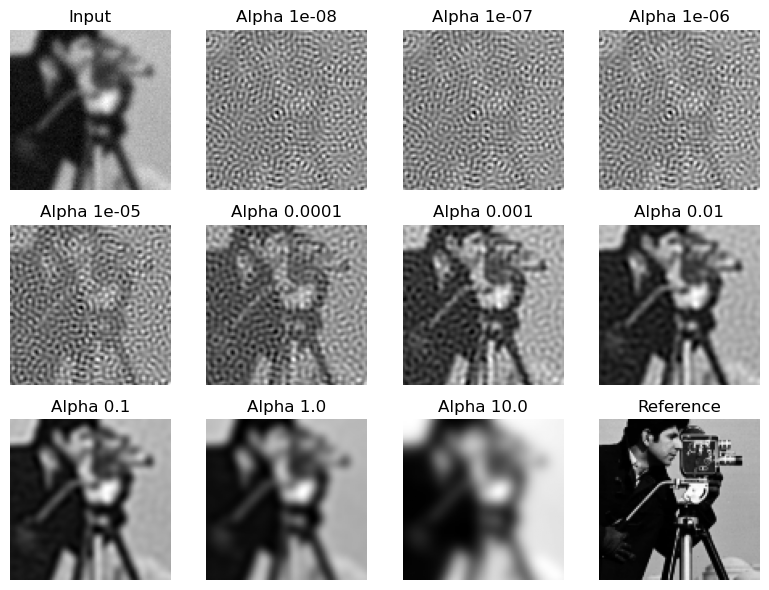

Optimal alpha: 0.06643212577201692
DP: 3.4959900473631087e-06, MSE: 0.004727608012017229


In [7]:
"""Find optimal alpha using GMRES and TK1"""
gmres_tuner.parameter_sweep(alphas=alphas, L=derivative_operator, save_imgs=True)
gmres_tuner.display_metrics()
gmres_tuner.display_sample(slice(50, 150), slice(80, 180))
print(f"Optimal alpha: {gmres_tuner.optimal_alpha}")
print(f"DP: {gmres_tuner.optimal_metrics['discrepancy']}, MSE: {gmres_tuner.optimal_metrics['MSE']}")
gmres_tk1_f_hat = gmres_tuner._optimal_f_hat

[INFO] 2025-02-25 14:43:53 | Alpha 1e-08: discrepancy -8.086178203021353e-05 | evaluation.eval_metrics-log_metrics:211
[INFO] 2025-02-25 14:43:53 | Alpha 1e-07: discrepancy -8.086087935310182e-05 | evaluation.eval_metrics-log_metrics:211
[INFO] 2025-02-25 14:43:54 | Alpha 1e-06: discrepancy -8.084889974259001e-05 | evaluation.eval_metrics-log_metrics:211
[INFO] 2025-02-25 14:43:54 | Alpha 1e-05: discrepancy -8.050340083735555e-05 | evaluation.eval_metrics-log_metrics:211
[INFO] 2025-02-25 14:43:55 | Alpha 0.0001: discrepancy -7.402254253716561e-05 | evaluation.eval_metrics-log_metrics:211
[INFO] 2025-02-25 14:43:55 | Alpha 0.001: discrepancy -5.78263212297337e-05 | evaluation.eval_metrics-log_metrics:211
[INFO] 2025-02-25 14:43:55 | Alpha 0.01: discrepancy -3.697690290195907e-05 | evaluation.eval_metrics-log_metrics:211
[INFO] 2025-02-25 14:43:55 | Alpha 0.1: discrepancy 2.193993874858582e-05 | evaluation.eval_metrics-log_metrics:211
[INFO] 2025-02-25 14:43:56 | Alpha 1.0: discrepancy 

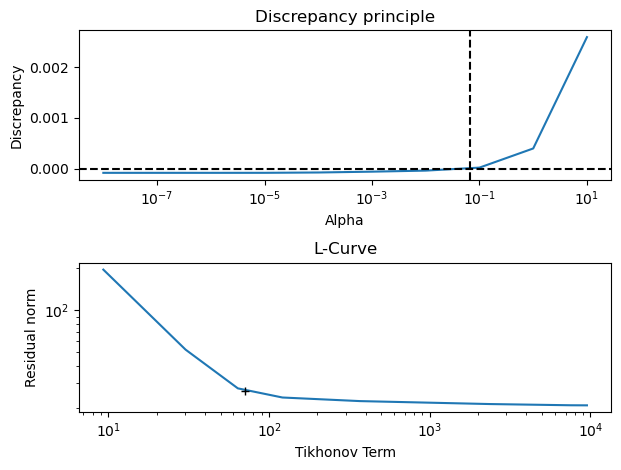

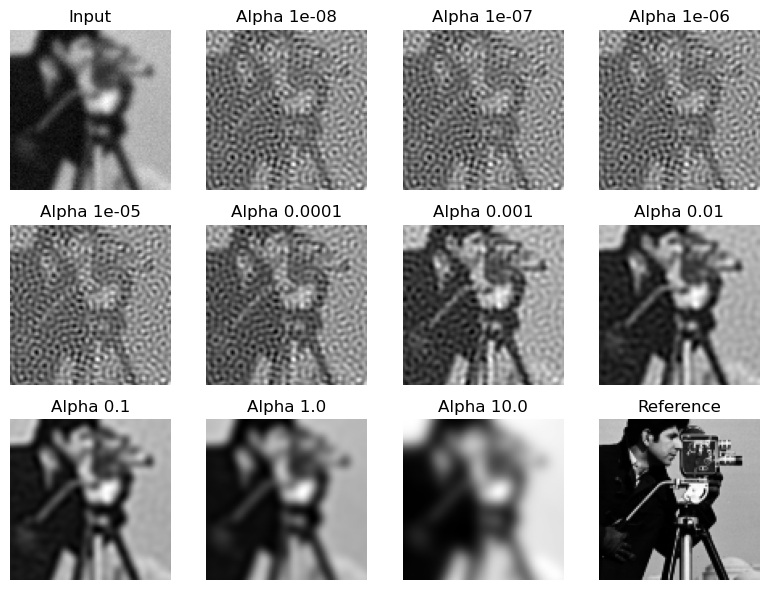

Optimal alpha: 0.06648505873609636
DP: 3.5212722704052596e-06, MSE: 0.004727654258638637


In [8]:
"""Find optimal alpha using LSQR and TK1"""
lsqr_tuner.parameter_sweep(alphas=alphas, L=derivative_operator, save_imgs=True)
lsqr_tuner.display_metrics()
lsqr_tuner.display_sample(slice(50, 150), slice(80, 180))
print(f"Optimal alpha: {lsqr_tuner.optimal_alpha}")
print(f"DP: {lsqr_tuner.optimal_metrics['discrepancy']}, MSE: {lsqr_tuner.optimal_metrics['MSE']}")
lsqr_tk1_f_hat = lsqr_tuner._optimal_f_hat

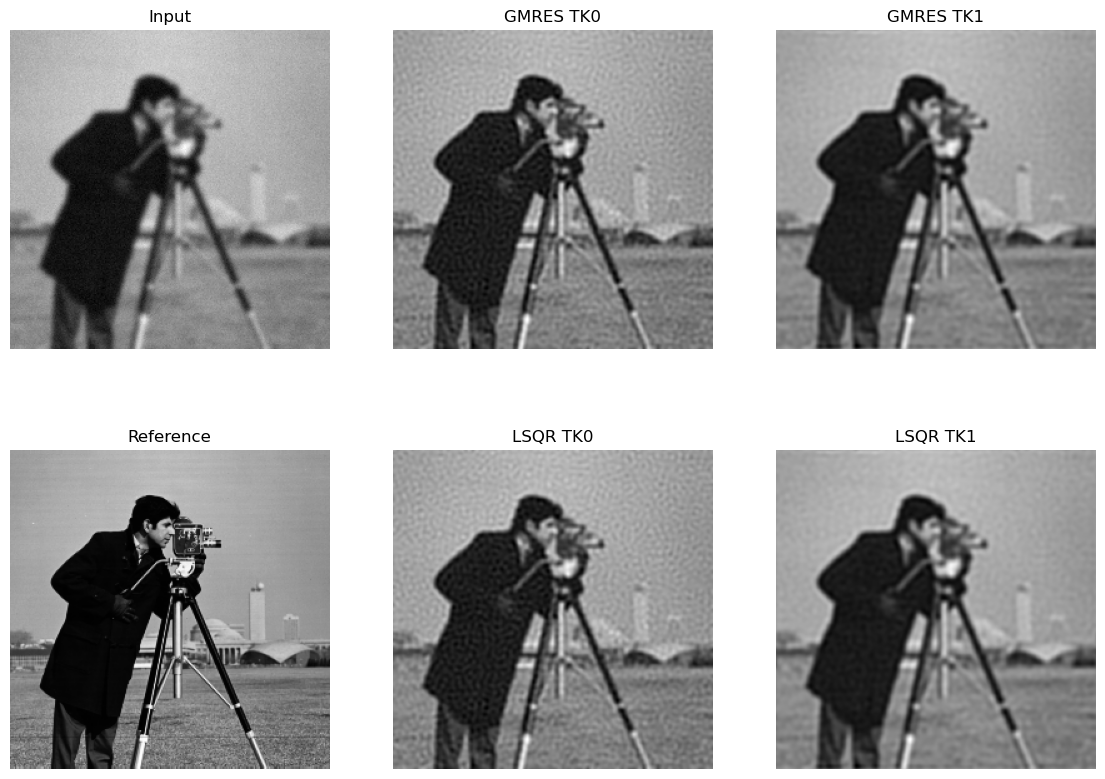

In [9]:
"""Compare different techniques"""

_, axs = plt.subplots(2, 3, figsize=(14, 10))
axs[0, 0].imshow(g, cmap="gray")
axs[0, 0].set_title("Input")
axs[0, 0].axis("off")
axs[0, 1].imshow(gmres_tk0_f_hat, cmap="gray")
axs[0, 1].set_title("GMRES TK0")
axs[0, 1].axis("off")
axs[0, 2].imshow(gmres_tk1_f_hat, cmap="gray")
axs[0, 2].set_title("GMRES TK1")
axs[0, 2].axis("off")
axs[1, 0].imshow(f, cmap="gray")
axs[1, 0].set_title("Reference")
axs[1, 0].axis("off")
axs[1, 1].imshow(lsqr_tk0_f_hat, cmap="gray")
axs[1, 1].set_title("LSQR TK0")
axs[1, 1].axis("off")
axs[1, 2].imshow(lsqr_tk1_f_hat, cmap="gray")
axs[1, 2].set_title("LSQR TK1")
axs[1, 2].axis("off")
plt.show()